In [2]:
pip install gaze_tracking

Note: you may need to restart the kernel to use updated packages.


Press 'q' to quit.


C:\Users\omar3\AppData\Local\Temp\ipykernel_15408\4080212164.py:78: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df["X"], y=df["Y"], cmap="Reds", shade=True, bw_adjust=0.5)


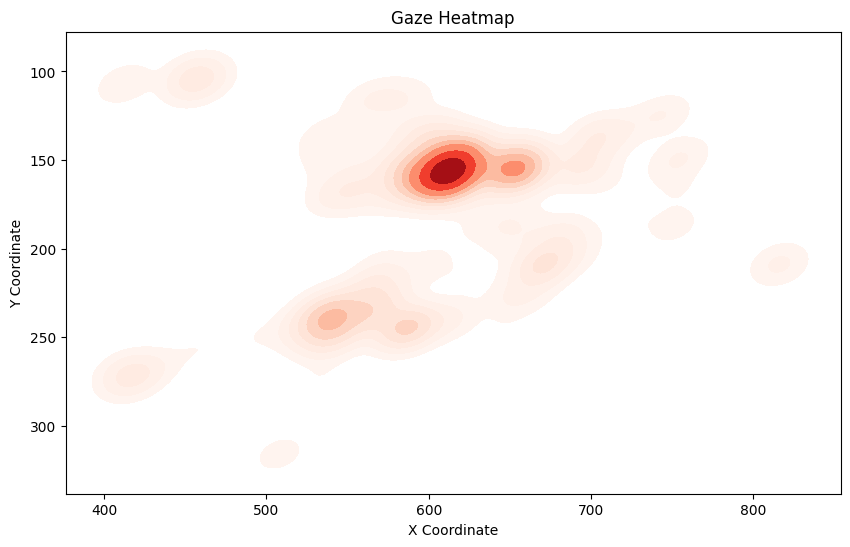

In [ ]:
import cv2
import csv
import os
from gaze_tracking.gaze_tracking import GazeTracking
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize GazeTracking library
gaze = GazeTracking()

# Open the webcam
video_capture = cv2.VideoCapture(0)

# CSV file setup
output_file = "gaze_coordinates.csv"
fieldnames = ["X", "Y"]

# Create or overwrite the file
with open(output_file, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

# Initialize a list to collect gaze coordinates
gaze_points = []

print("Press 'q' to quit.")

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    # Analyze gaze
    gaze.refresh(frame)
    frame = gaze.annotated_frame()
    text = ""

    if gaze.is_blinking():
        text = "Blinking"
    elif gaze.is_right():
        text = "Looking right"
    elif gaze.is_left():
        text = "Looking left"
    elif gaze.is_center():
        text = "Looking center"

    cv2.putText(frame, text, (90, 60), cv2.FONT_HERSHEY_DUPLEX, 1.6, (147, 58, 31), 2)

    # Get gaze point
    x, y = gaze.pupil_left_coords() or (None, None)

    # Save valid coordinates
    if x is not None and y is not None:
        gaze_points.append((x, y))
        with open(output_file, mode="a", newline="") as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writerow({"X": x, "Y": y})

    # Display the gaze tracking results
    cv2.imshow("Gaze Tracking", frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
video_capture.release()
cv2.destroyAllWindows()

# Convert gaze points to a DataFrame
df = pd.DataFrame(gaze_points, columns=["X", "Y"])

# Generate a heatmap from the gaze points
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df["X"], y=df["Y"], cmap="Reds", shade=True, bw_adjust=0.5)
plt.title("Gaze Heatmap")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.gca().invert_yaxis()  # Invert Y-axis for screen-like displayq
plt.show()